In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats



def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../data/portfolio3_ETL.csv'
portfolio3 = load_data(filepath)

portfolio3 = portfolio3.drop(columns=['id'])
portfolio3.head()

,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_rm,fl_spa,fl_antt,fl_veiculo,...,nm_divisao_ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS,nm_divisao_DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE RESIDUOS,nm_divisao_EXTRACAO DE PETROLEO E GAS NATURAL,nm_divisao_FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACEUTICOS,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",de_saude_rescencia_ATE 3 MESES,nm_divisao_EXTRACAO DE CARVAO MINERAL,de_saude_rescencia_ATE 6 MESES,nm_divisao_FABRICACAO DE PRODUTOS DO FUMO
0,21.81,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.39,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.38,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43.85,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.87,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#To fixate the results between attempts we'll set the random state to 42
random_state = 42

pca = PCA(n_components = None, random_state = random_state)
pca_p1 = pca.fit_transform(portfolio3)
pca.explained_variance_ratio_

array([3.47489458e-01, 2.66831447e-01, 1.79274854e-01, 1.65025713e-01,
       3.51525266e-02, 9.26660234e-04, 6.87115331e-04, 5.31406134e-04,
       4.69115873e-04, 3.94268520e-04, 3.59063026e-04, 3.18925859e-04,
       2.54396457e-04, 2.36972670e-04, 1.82660455e-04, 1.61930000e-04,
       1.45938765e-04, 1.32211190e-04, 1.11875138e-04, 1.02417196e-04,
       9.13497662e-05, 8.56727170e-05, 8.02518428e-05, 7.20534431e-05,
       7.06187366e-05, 6.01614576e-05, 5.65655449e-05, 4.84253688e-05,
       4.30955641e-05, 4.15374478e-05, 3.86415560e-05, 3.54860621e-05,
       3.44483872e-05, 3.27937315e-05, 2.68484776e-05, 2.62103401e-05,
       2.32903832e-05, 2.15084789e-05, 2.12622838e-05, 1.96083778e-05,
       1.84161012e-05, 1.77411356e-05, 1.67489603e-05, 1.62483811e-05,
       1.44598440e-05, 1.33224469e-05, 1.29814579e-05, 1.25693487e-05,
       1.16554167e-05, 1.07395131e-05, 9.92217679e-06, 9.83578564e-06,
       9.41645340e-06, 9.22854388e-06, 8.61361424e-06, 8.45983336e-06,
      

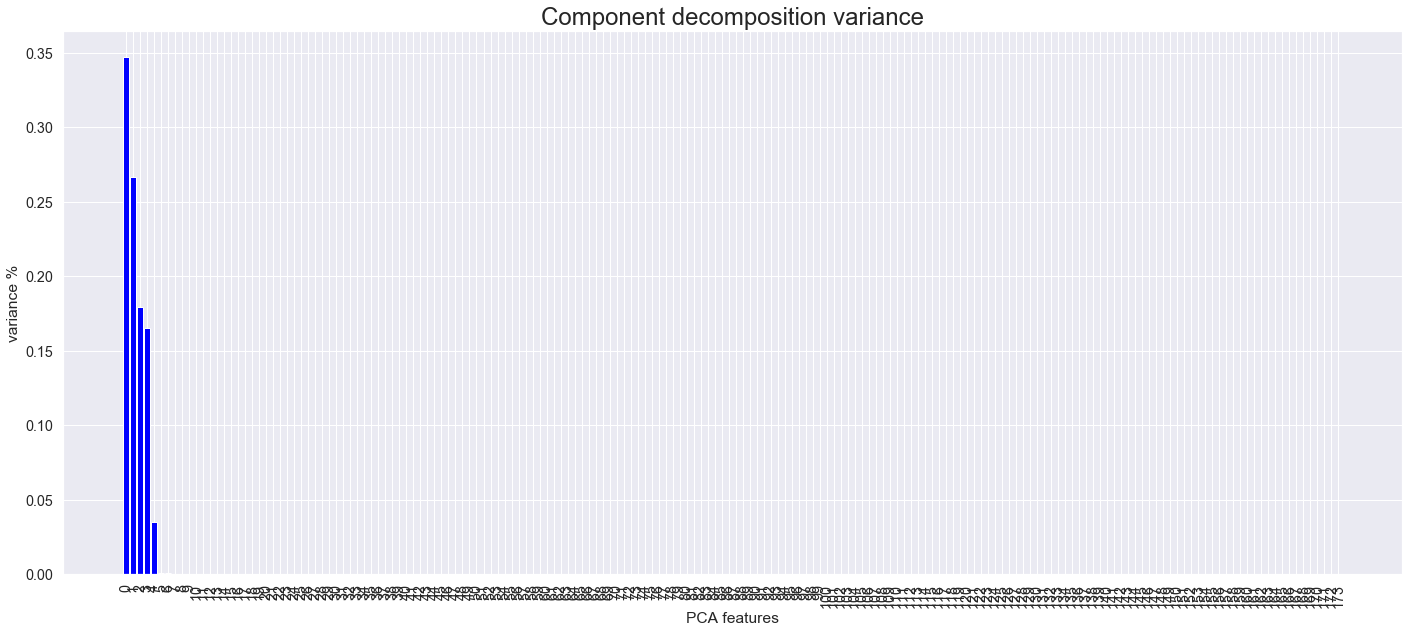

In [3]:
sns.set(font_scale = 1.3)
features = range(pca.n_components_)
plt.figure(figsize=(24,10))
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.title("Component decomposition variance", fontsize=24)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(rotation=90)
plt.xticks(features)
plt.show()

In [4]:
#Just so we can fix a point between attempts we'll work with every compononet that is higher that 2.5%
components_limit = 0.025
components = pca.explained_variance_ratio_[pca.explained_variance_ratio_ > components_limit]
number_components = len(components)

pca = PCA(n_components = number_components, random_state = random_state) 
X = pca.fit_transform(portfolio3)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.34748946, 0.26683145, 0.17927485, 0.16502571, 0.03515253]),
 0.9937739997705861)

In [5]:
pca = PCA(n_components = number_components, random_state = random_state)
pca_p1 = pca.fit_transform(portfolio3)
inverse_transform_p1 = pca.inverse_transform(pca_p1)

print("portfolio3 shape",portfolio3.shape)
print("pca_p1 shape",pca_p1.shape)
print("inverse_transform_p1 shape",inverse_transform_p1.shape)

portfolio3 shape (265, 174)
pca_p1 shape (265, 5)
inverse_transform_p1 shape (265, 174)


In [6]:
MSE_score = ((portfolio3-inverse_transform_p1)**2).sum(axis=1)

MSE_score.head()

0    4.260144
1    5.506847
2    5.353976
3    4.436820
4    3.230688
dtype: float64

In [7]:
MSE_score.sort_values(ascending=False)

166    20.446485
49     11.242871
261    10.482896
52     10.257797
202     9.200123
         ...    
160     1.981553
63      1.863957
59      1.863510
184     1.859874
102     0.357486
Length: 265, dtype: float64

In [8]:
MSE_score.mean()

4.643966848918833

In [9]:
MSE_max_scores = MSE_score.nlargest(9).index

portfolio3.iloc[MSE_max_scores]

,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_rm,fl_spa,fl_antt,fl_veiculo,...,nm_divisao_ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS,nm_divisao_DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE RESIDUOS,nm_divisao_EXTRACAO DE PETROLEO E GAS NATURAL,nm_divisao_FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACEUTICOS,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",de_saude_rescencia_ATE 3 MESES,nm_divisao_EXTRACAO DE CARVAO MINERAL,de_saude_rescencia_ATE 6 MESES,nm_divisao_FABRICACAO DE PRODUTOS DO FUMO
166,17.39,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,24.79,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261,22.49,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,46.87,0,0,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,2.96,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,24.07,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,10.79,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,0.76,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,26.40,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Interquartile Range Method
q25, q75 = np.percentile(MSE_score, 25), np.percentile(MSE_score, 75)
iqr = q75 - q25

print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=3.671, 75th=5.472, IQR=1.801


In [11]:
cut_off = iqr * 1.5
upper = q75 + cut_off/2#accounting for the lack of lower bracket
upper, cut_off

(6.823165530663381, 2.701539249890284)

In [12]:
outliers = [x for x in MSE_score if x > upper]
print('Identified outliers: %d' % len(outliers))
len(MSE_score)

Identified outliers: 12


265

In [13]:
outliers_removed = [x for x in  MSE_score if x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 253


In [14]:
MSE_array = np.array(MSE_score)

indices = [np.where(MSE_array==x)[0][0] for x in outliers_removed]
no_outliers_p1 = portfolio3.iloc[indices]
no_outliers_p1.shape

(253, 174)

In [15]:
def load_data(df,filepath):
    '''
    Input
    pandas dataframe and the filepath to save the dataframe
    Output
    File with the pandas dataframe
    '''
    df.to_csv(filepath, index = False)
    
filepath_save = '../data/portfolio3_no_outliers.csv'
load_data(no_outliers_p1,filepath_save)